# Notebook objectives:

### 1. Convince you that [the bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) is not bullshit.
### 2. Convince you that the [central limit theorem (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem) and the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) break down under fairly common circumstances.
### 3. Demonstrate the value of [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) tests.

# Background:

### **1. Who the heck is [Bradley Efron](https://en.wikipedia.org/wiki/Bradley_Efron)?** - One of the most important statisticians of the 20th century.

<img src="images/2014_Efron-outdoors.jpg">

### **2. What the heck is the bootstrap?** - A resampling method that is extremely useful for AB testing and validation of ML models. The original data is resampled with replacement to produce many more datasets of equal size to the original. The distribution and variance of the original sample is preserved in the new samples.

<img src="images/bootstrap-scheme.png">

### **3. What if I want to do a deep dive on the bootstrap?** - This [book](https://www.amazon.com/Introduction-Bootstrap-Monographs-Statistics-Probability/dp/0412042312) by Efron himself is considered one of the best texts on the subject. By the way, the [co-author](https://en.wikipedia.org/wiki/Robert_Tibshirani) is the dude who invented the [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)).

<img src="images/rob.jpg">

### **4. What is the [central limit theorem (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem)?** - It states that the [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution) of the sample means approaches a normal distribution as sample size increases. The t-test depends on the sampling distribution of sample means being Student's t-distributed.

<img src="images/Student_t_pdf.png">

### **5. What is [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)?** - The best possible A/B testing method... if you live in the early 1900's and don't have access to computers. Note, it is generally preferable to use Welch's t-test which is robust to differing variance in groups A and B.

<img src="images/William_Sealy_Gosset.jpg">


### **6. So how does the t-test work?** - The assumption is made that the sample A and sample B are drawn from the same distribution (null hypothesis is true) and that their means belong to the same Student's t-distribution. The p-value is the probability that the sample means belong to the same Student's t-distribution. If the p-value is sufficiently small, we reject the null hypothesis.

<img src="images/Null_Hypothesis.png">

## Imports

In [1]:
# standard library imports
import os
import sys
# third party imports
import numpy as np
import pandas as pd

# local imports (Nick's custom functions)
sys.path.append(os.path.join('..', 'src'))
import utils

## Create normally distributed samples
- `norm1` and `norm2` have the same mean and std dev but different random seeds
- `norm3` has a different random seed and a slightly different mean than `norm1` and `norm2`

[numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [2]:
np.random.seed(97)
norm1 = np.random.normal(loc=5.0, scale=1.0, size=500)

np.random.seed(98)
norm2 = np.random.normal(loc=5.0, scale=1.0, size=500)

np.random.seed(99)
norm3 = np.random.normal(loc=5.1, scale=1.0, size=500)

## Plot the distributions of `norm1` and `norm2`

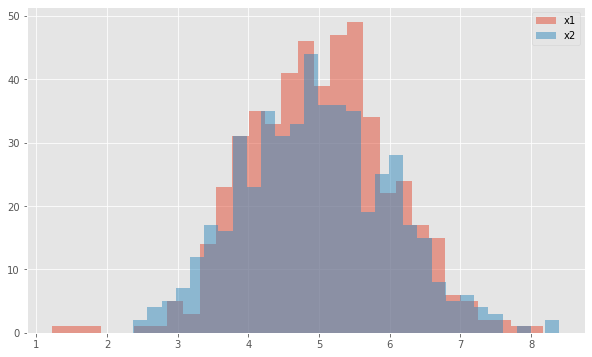

In [3]:
utils.make_hist(x1=norm1, x2=norm2)

## Welch's t-test on `norm1` and `norm2`
- Fail to reject null hypothesis

In [4]:
pd.Series(utils.t_test(x1=norm1, x2=norm2))

t_stat          0.758229
p_value         0.448493
df            995.259376
diff_means     -0.049034
ci_lower       -0.175936
ci_upper        0.077869
dtype: float64

## Use the "bootstrap" to generate a distribution of differences in means
- Zero difference falls within the 95% CI (difference not significant)
- Notice the excellent agreement between the CIs for the T-test and the bootstrap
- The distribution gives additional information about probability of various differences in means

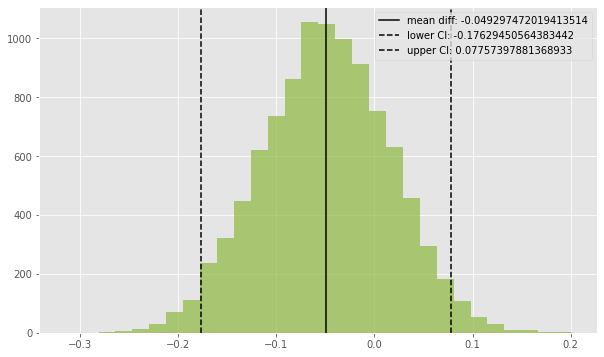

In [5]:
mean_diffs = utils.bootstrap_test(norm1, norm2)
utils.plot_bootstrap(mean_diffs)

## Plot the distributions of `norm1` and `norm3`

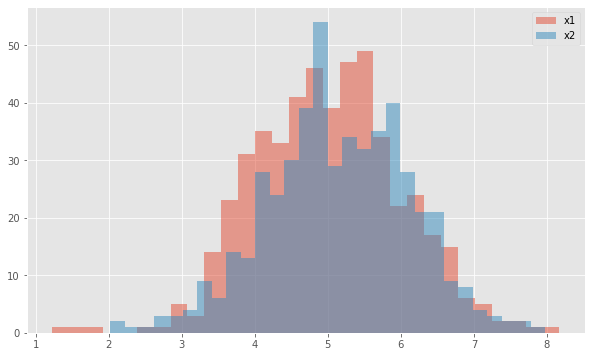

In [6]:
utils.make_hist(x1=norm1, x2=norm3)

## Welch's t-test on `norm1` and `norm3`
- Null hypothesis is rejected

In [7]:
pd.Series(utils.t_test(x1=norm1, x2=norm3))

t_stat         -2.128263
p_value         0.033560
df            997.903101
diff_means      0.133317
ci_lower        0.010393
ci_upper        0.256240
dtype: float64

## Use the "bootstrap" to generate a distribution of differences in means
- Zero difference does not falls within the 95% CI (difference is significant)
- Again, notice the excellent agreement between the CIs for the T-test and the bootstrap

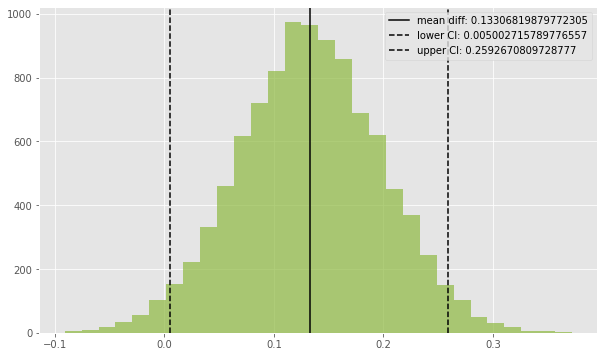

In [8]:
mean_diffs = utils.bootstrap_test(norm1, norm3)
utils.plot_bootstrap(mean_diffs)

## Circumstances under which the CLT breaks down
Nice discussion on [stackexchange](https://stats.stackexchange.com/questions/348972/are-there-any-examples-of-where-the-central-limit-theorem-does-not-hold)
- Not identically distributed ([multimodal](https://en.wikipedia.org/wiki/Multimodal_distribution) data or [zero-inflated](https://en.wikipedia.org/wiki/Zero-inflated_model) data)

- Strict bound on one side of the data (outliers thrown out, capped data, percent lift)
- Lack of independence (experiment design or execution issues)
- Non-finite variance or mean ([Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution), [Pareto](https://en.wikipedia.org/wiki/Pareto_distribution) and a number of other distributions)

## Create samples that will cause the CLT and t-test to break down
- `dist1` and `dist2` have the same mean and std dev but different random seeds
- `dist3` has different random seed and a slightly different mean than `dist1` and `distt2`

[numpy.random.lognormal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html)

In [9]:
np.random.seed(97)
dist1 = np.append(
    np.random.lognormal(sigma=0.7, size=200),
    np.random.normal(loc=8.0, scale=1.0, size=300),
)

np.random.seed(98)
dist2 = np.append(
    np.random.lognormal(sigma=0.7, size=200),
    np.random.normal(loc=8.0, scale=1.0, size=300),
)

np.random.seed(99)
dist3 = np.append(
    np.random.lognormal(sigma=0.7, size=200) + 0.1,
    np.random.normal(loc=8.1, scale=1.0, size=300),
)

## Plot the distributions of `dist1` and `dist2`

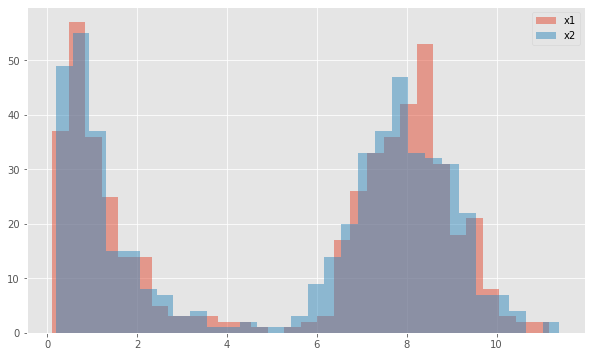

In [10]:
utils.make_hist(x1=dist1, x2=dist2)

## Welch's T-test on `dist1` and `dist2`
- Fail to reject null hypothesis

In [11]:
pd.Series(utils.t_test(x1=dist1, x2=dist2))

t_stat          0.132713
p_value         0.894447
df            997.839773
diff_means     -0.029399
ci_lower       -0.464110
ci_upper        0.405311
dtype: float64

## Use the "bootstrap" to generate a distribution of differences in means
- Zero difference falls within the 95% CI (difference not significant)
- Notice the **lack** of agreement between the CIs for the T-test and the bootstrap

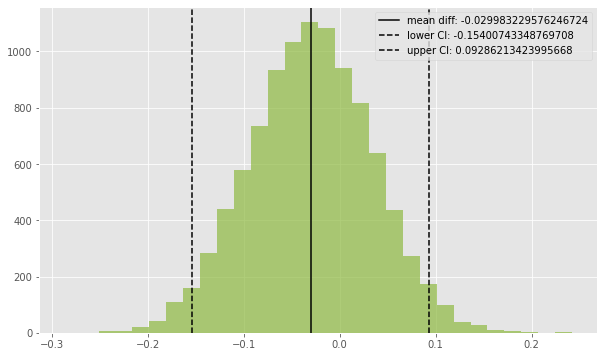

In [12]:
mean_diffs = utils.bootstrap_test(dist1, dist2)
utils.plot_bootstrap(mean_diffs)

## Plot the distributions of `dist1` and `dist3`

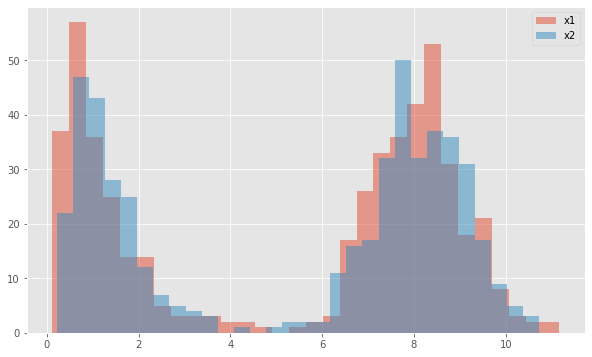

In [13]:
utils.make_hist(x1=dist1, x2=dist3)

## Welch's T-test on `dist1` and `dist3`
- Fail to reject null hypothesis

In [14]:
pd.Series(utils.t_test(x1=dist1, x2=dist3))

t_stat         -0.590267
p_value         0.555145
df            997.723636
diff_means      0.130504
ci_lower       -0.303357
ci_upper        0.564365
dtype: float64

## Use the "bootstrap" to generate a distribution of differences in means
- Zero difference does not falls within the 95% CI (difference is significant)
- Again, notice the **lack** of agreement between the CIs for the T-test and the bootstrap

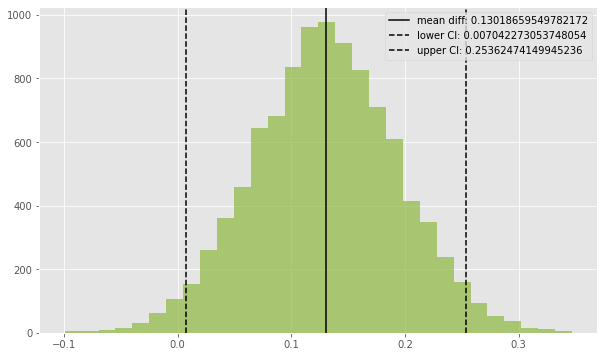

In [15]:
mean_diffs = utils.bootstrap_test(dist1, dist3)
utils.plot_bootstrap(mean_diffs)

## Why are the confidence intervals so different in this case?

Let's consider the equation for standard deviation:

<img src="images/sd.svg">

and the equation for standard error of the mean:

<img src="images/se.svg">

# Okay, I'm interested. Why would I want to use the bootstrap for AB testing?

### 1. It makes no assumptions about the sampling distribution allowing a much wider variety of metrics to be studied (imagine a world where we tested more than means and proportions). 
### 2. It's more intuitive to generate, visualize, and work with an actual distribution of sampling distribution than a theoretical, unobserved one.
### 3. It more organically leads to quantifying the difference between the groups being tested.